# Home work 4
In this homework we're going to implement log barrier and interior point methods for solving a general QP optimization problem.
I've implemented the log barrier and interior point methods in the `algorithms.py` file and imported them along with some required libraries here.

In [1]:
import numpy as np
from pylab import rcParams
from matplotlib import pyplot as plt
from algorithms import log_barrier_for_qp, interior_point_for_qp

%matplotlib inline
rcParams['figure.figsize'] = 10, 5

## Generating a random QP problem wich is convex
Here we generate a random convex problem with a 100-dimensioned input vector and 200 constraints.
We assure convexity by constrainting `P` to be a positive semi definite matrix. 

In [2]:
n = 100
m = 200
p_helper = np.random.rand(n, n)
P = np.dot(p_helper, p_helper.T)
q = np.random.rand(n, 1)
A = np.random.rand(m, n)
b = np.random.rand(m, 1)

## Log Barrier Method
We use the `log_barrier_for_qp` method to solve the generated QP problem and plot the duality gaps on each iteration.

Iteration: 62 - final gap: 0.000063


Text(0.5, 1.0, 'Log barrier method applied on the random convex QP')

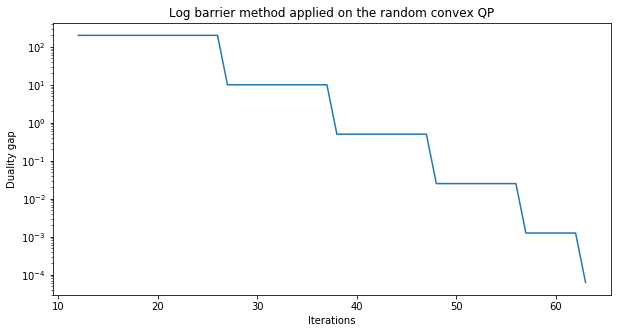

In [8]:
gaps = log_barrier_for_qp(P, q, A, b, alpha=0.01, beta=0.5, mu=20, iterations=200)

rcParams['figure.figsize'] = 10, 5
plt.plot(list(range(1, len(gaps) + 1)), gaps)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Duality gap')
plt.title('Log barrier method applied on the random convex QP')

## Interior Point Method
Then we apply the `interior_point_for_qp` method on the generated QP problem to solve it using interior point method.
We then plot the surrogate duality gap and dual residual on each step to check the method's performance.

Text(0.5, 1.0, 'Interior point method applied on the random convex QP')

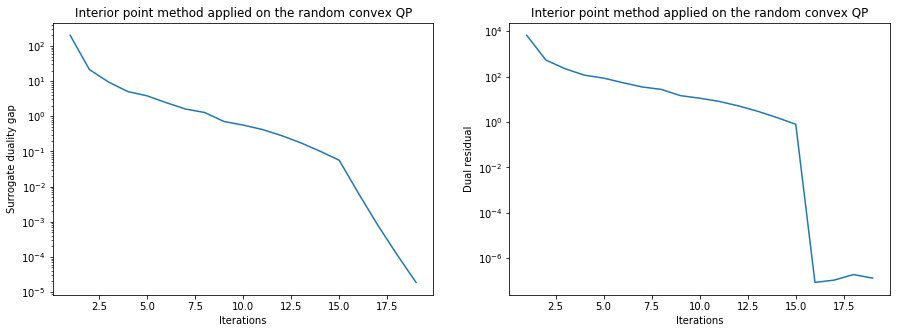

In [ ]:
surrogates, dual_residuals = interior_point_for_qp(P, q, A, b, alpha=0.01, beta=0.5, mu=10, iterations=200, tol=1e-4, eps=1e-6)
iterations = list(range(1, len(surrogates) + 1))

rcParams['figure.figsize'] = 15, 5

plt.subplot(1, 2, 1)
plt.plot(iterations, surrogates)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Surrogate duality gap')
plt.title('Interior point method applied on the random convex QP')

plt.subplot(1, 2, 2)
plt.plot(iterations, dual_residuals)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Dual residual')
plt.title('Interior point method applied on the random convex QP')
